In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.applications import VGG16

from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [4]:
# 데이터 정규화 ( 0~1 값 갖도록 )

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

T-shirt/top


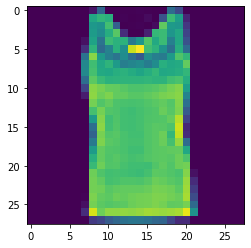

In [5]:
class_name = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankel boot'
]

# 학습 데이터셋 중에서 하나의 이미지 보여주기
img_index = 1005

plt.imshow(x_train[img_index])
print(class_name[y_train[img_index]])

In [14]:
model = Sequential()

#RGB값이 없는 흑백이므로 input_shape 마지막 차원 3이 아닌 1
model.add(Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_89 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_91 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

In [15]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
print(y_train.shape)
print(y_test.shape)

from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)
(60000, 10)
(10000, 10)


In [37]:
###################################모델 학습#######################################

In [18]:
hist = model.fit(
                x = x_train,
                y = y_train,
                epochs=10,
                batch_size=64
                )

Epoch 1/10
938/938 [==============================] - 1573s 2s/step - loss: 0.7566 - accuracy: 0.7042
Epoch 2/10
938/938 [==============================] - 1574s 2s/step - loss: 0.3412 - accuracy: 0.8757
Epoch 3/10
938/938 [==============================] - 1568s 2s/step - loss: 0.2891 - accuracy: 0.8972
Epoch 4/10
938/938 [==============================] - 1476s 2s/step - loss: 0.2521 - accuracy: 0.9091
Epoch 5/10
938/938 [==============================] - 1256s 1s/step - loss: 0.2317 - accuracy: 0.9173
Epoch 6/10
938/938 [==============================] - 1253s 1s/step - loss: 0.2115 - accuracy: 0.9241
Epoch 7/10
938/938 [==============================] - 1277s 1s/step - loss: 0.1969 - accuracy: 0.9301
Epoch 8/10
938/938 [==============================] - 1353s 1s/step - loss: 0.1850 - accuracy: 0.9333
Epoch 9/10
938/938 [==============================] - 1419s 2s/step - loss: 0.1815 - accuracy: 0.9346
Epoch 10/10
938/938 [==============================] - 1445s 2s/step - loss: 0.162

In [23]:
############# 모델 저장 ##################

model.save("VGG16")

INFO:tensorflow:Assets written to: VGG16\assets


INFO:tensorflow:Assets written to: VGG16\assets


In [ ]:
############### 모델 불러오기 ###################

model = keras.models.load_model('./VGG16')

In [22]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

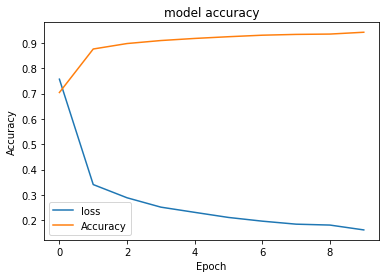

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss", "Accuracy"])
plt.show()

In [31]:
# 테스트 셋으로 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.920799970626831


In [ ]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

prob_pred = model.predict(x_test)
prob_label = prob_pred.argmax(axis=-1)
np.savetxt('y_pred.csv', prob_label,fmt='%d')